Joshua Matni
CS 458 (Data Mining) Project 3  Alternative Classification

P3-1. (U & G-required) Revisit Text Documents Classification Use the 20 newsgroups dataset embedded in scikit-learn:
from sklearn.datasets import fetch_20newsgroups

learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.f
(See https://scikit- etch_20newsgroups)

(a) Load the following 4 categories from the 20 newsgroups dataset: categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space'].

In [9]:
from sklearn.datasets import fetch_20newsgroups

categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

(b) Build classifiers using the following methods:
• Support Vector Machine (sklearn.svm.LinearSVC)
• Naive Bayes classifiers (sklearn.naive_bayes.MultinomialNB)
• K-nearest neighbors (sklearn.neighbors.KNeighborsClassifier)
• Random forest (sklearn.ensemble.RandomForestClassifier)
• AdaBoost classifier (sklearn.ensemble.AdaBoostClassifier)
Compare the classification accuracy of these methods.


In [10]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)

# vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# classifiers
classifiers = {
    'LinearSVC': svm.LinearSVC(),
    'MultinomialNB': MultinomialNB(),
    'KNeighbors': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

# train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')

LinearSVC Accuracy: 0.9888
MultinomialNB Accuracy: 0.9567
KNeighbors Accuracy: 0.9232
RandomForest Accuracy: 0.9148


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.8366


P3-2. (U & G-required) Recognizing hand-written digits Use the hand-written digits dataset embedded in scikit-learn:
from sklearn import datasets digits = datasets.load_digits()

(a) Develop a multi-layer perceptron classifier to recognize images of hand-written digits with the classification accuracy larger than 90%. To build your classifier, you can use:
sklearn.neural_network.MLPClassifier

(b) Show the confusion matrix of your neural network. Discuss and compare your results with the results using a support vector classifier (see https://scikit- learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto- examples-classification-plot-digits-classification-py).

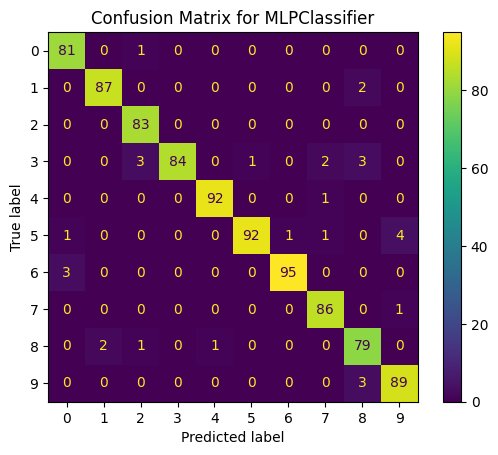

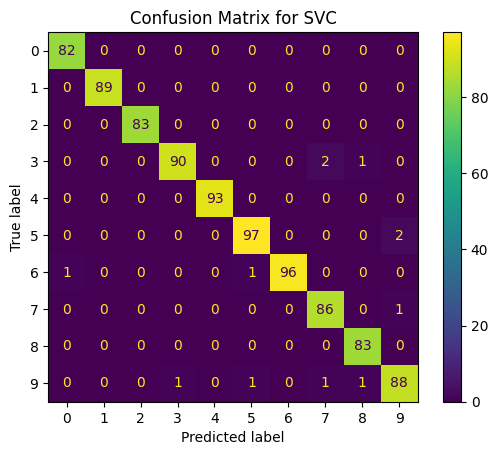

MLPClassifier Accuracy: 96.55%
SVC Accuracy: 98.67%


In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

digits = datasets.load_digits()

# test_size=0.5
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.5, random_state=42)

# train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# confusion matrix for MLPClassifier
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp_mlp.plot()
plt.title('Confusion Matrix for MLPClassifier')
plt.show()

# Support Vector Classifier
svc = SVC(gamma=0.001, random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# confusion matrix for SVC
cm_svc = confusion_matrix(y_test, y_pred_svc)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp_svc.plot()
plt.title('Confusion Matrix for SVC')
plt.show()

# classification accuracies
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'MLPClassifier Accuracy: {accuracy_mlp * 100:.2f}%')
print(f'SVC Accuracy: {accuracy_svc * 100:.2f}%')


The Support Vector Classifier (SVC) outperformed the MLPClassifier in recognizing handwritten digits, achieving an accuracy of 98.67% compared to the MLP's 96.55%. This suggests that the SVC was more effective in capturing the intricate patterns within the digit images. Although both models performed exceptionally well, the slight edge of the SVC might be due to its ability to find the optimal hyperplane that separates the classes with maximum margin. The confusion matrices show that the SVC had fewer misclassifications across most digit classes. In contrast, the MLPClassifier, being a neural network, may require more fine-tuning of hyperparameters such as the number of hidden layers or neurons to match the SVC's performance. Overall, while both classifiers are robust for image recognition tasks, the SVC demonstrated a marginally superior ability to generalize from the training data in this case.

P3-3. (G-required) Nonlinear Support Vector Machine

(a) Randomly generate the following 2-class data points

(b) Develop a nonlinear SVM binary classifier (sklearn.svm.NuSVC).

(c) Plot these data points and the corresponding decision boundaries

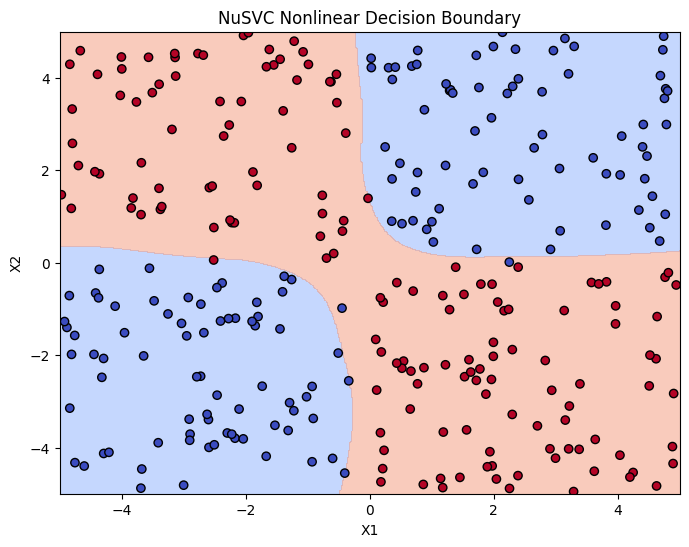

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import NuSVC

np.random.seed(0)
X = np.random.rand(300, 2) * 10 - 5
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# nonlinear SVM binary classifier
clf = NuSVC(kernel='rbf', gamma='auto')  # RBF kernel for nonlinearity
clf.fit(X, Y)

# data points and the corresponding decision boundaries
# mesh grid for plotting
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('NuSVC Nonlinear Decision Boundary')
plt.show()